## ML 2 - Employee Attrition Hackathon

In [2]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/HarpyTech/DSAI-MTech/refs/heads/main/ML2/Employee_Attrition/Train_Dataset.csv")
test = pd.read_csv("https://raw.githubusercontent.com/HarpyTech/DSAI-MTech/refs/heads/main/ML2/Employee_Attrition/Test_Dataset.csv")

In [4]:
data.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [5]:
test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [7]:
data.columns, test.columns

(Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
        'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
        'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
        'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
        'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
        'MonthlyIncome'],
       dtype='object'),
 Index(['EmployeeID', 'Age', 'TravelProfile', 'Department', 'HomeToWork',
        'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
        'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
        'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
        'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
        'MonthlyIncome'],
       dtype='object'))

### EDA Analysis

In [8]:
data.Attrition.value_counts()

,count
Attrition,
0.0,3735
1.0,1445


In [9]:
data.isnull().sum()

,0
EmployeeID,2630
Attrition,2630
Age,2946
TravelProfile,2630
Department,2754
HomeToWork,2885
EducationField,2630
Gender,2676
HourlnWeek,2917
Involvement,2630


In [10]:
data.describe()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,5.180000e+03,5180.000000,4864.000000,4925.000000,4893.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5011.000000,4993.000000,5110.000000,4869.000000,5087.000000
mean,5.112590e+06,0.278958,37.108553,11.107411,57.979767,3.226641,3.012741,3.144402,0.490541,3.157336,0.313514,20.649371,11.165832,2.552838,4.385295,21692.296442
std,1.495482e+03,0.448530,9.248647,8.455577,12.996674,0.872431,1.410602,1.342776,0.499959,2.606036,0.463966,3.706469,7.797783,3.234467,3.617643,4770.637922
min,5.110001e+06,0.000000,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,5.111296e+06,0.000000,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18362.000000
50%,5.112590e+06,0.000000,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,9.000000,1.000000,3.000000,20160.000000
75%,5.113885e+06,1.000000,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23443.500000
max,5.115180e+06,1.000000,61.000000,121.000000,99.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,95000.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

Here we are dropping the records with Empty Values

In [23]:
data = data.iloc[0:5179]

Null Values Identification

In [27]:
null_values = data.isnull().sum()
null_values = pd.DataFrame(null_values)
null_values.columns = ['Null_Values']
null_values

,Null_Values
EmployeeID,0
Attrition,0
Age,315
TravelProfile,0
Department,124
HomeToWork,255
EducationField,0
Gender,46
HourlnWeek,287
Involvement,0


In [28]:
null_values["Percet"] = (null_values["Null_Values"]/len(data))*100
null_values

,Null_Values,Percet
EmployeeID,0,0.000000
Attrition,0,0.000000
Age,315,6.082255
TravelProfile,0,0.000000
Department,124,2.394285
HomeToWork,255,4.923730
EducationField,0,0.000000
Gender,46,0.888202
HourlnWeek,287,5.541610
Involvement,0,0.000000


We have 3 columns which have more null values, for them we have to apply imputing

In [30]:
data.describe(include=object)

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
count,5179,5055,5179,5133,5141,5179
unique,3,3,6,3,5,4
top,Rarely,Analytics,Statistics,Male,Executive,Single
freq,3637,3219,2128,3093,2071,1776


In [31]:
data.shape

(5179, 22)

In [32]:
data.dropna().shape

(3454, 22)

Not dropping the NaN rows since we are loosing the large data i.e around 40% of records if we  drop the NaN records due to the missing information in large data set randomly, so we will by applying Imputation into all the columns instead of droping the records

In [33]:
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(exclude='object').columns
categorical_columns, numerical_columns

(Index(['TravelProfile', 'Department', 'EducationField', 'Gender',
        'Designation', 'MaritalStatus'],
       dtype='object'),
 Index(['EmployeeID', 'Attrition', 'Age', 'HomeToWork', 'HourlnWeek',
        'Involvement', 'WorkLifeBalance', 'JobSatisfaction', 'ESOPs',
        'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
        'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome'],
       dtype='object'))

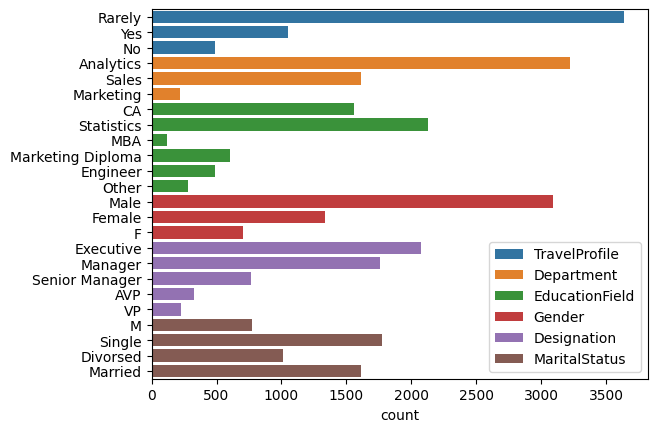

In [38]:
for i in categorical_columns:
  sns.countplot(data[i])

plt.legend(categorical_columns)
plt.ylabel("")
plt.show()

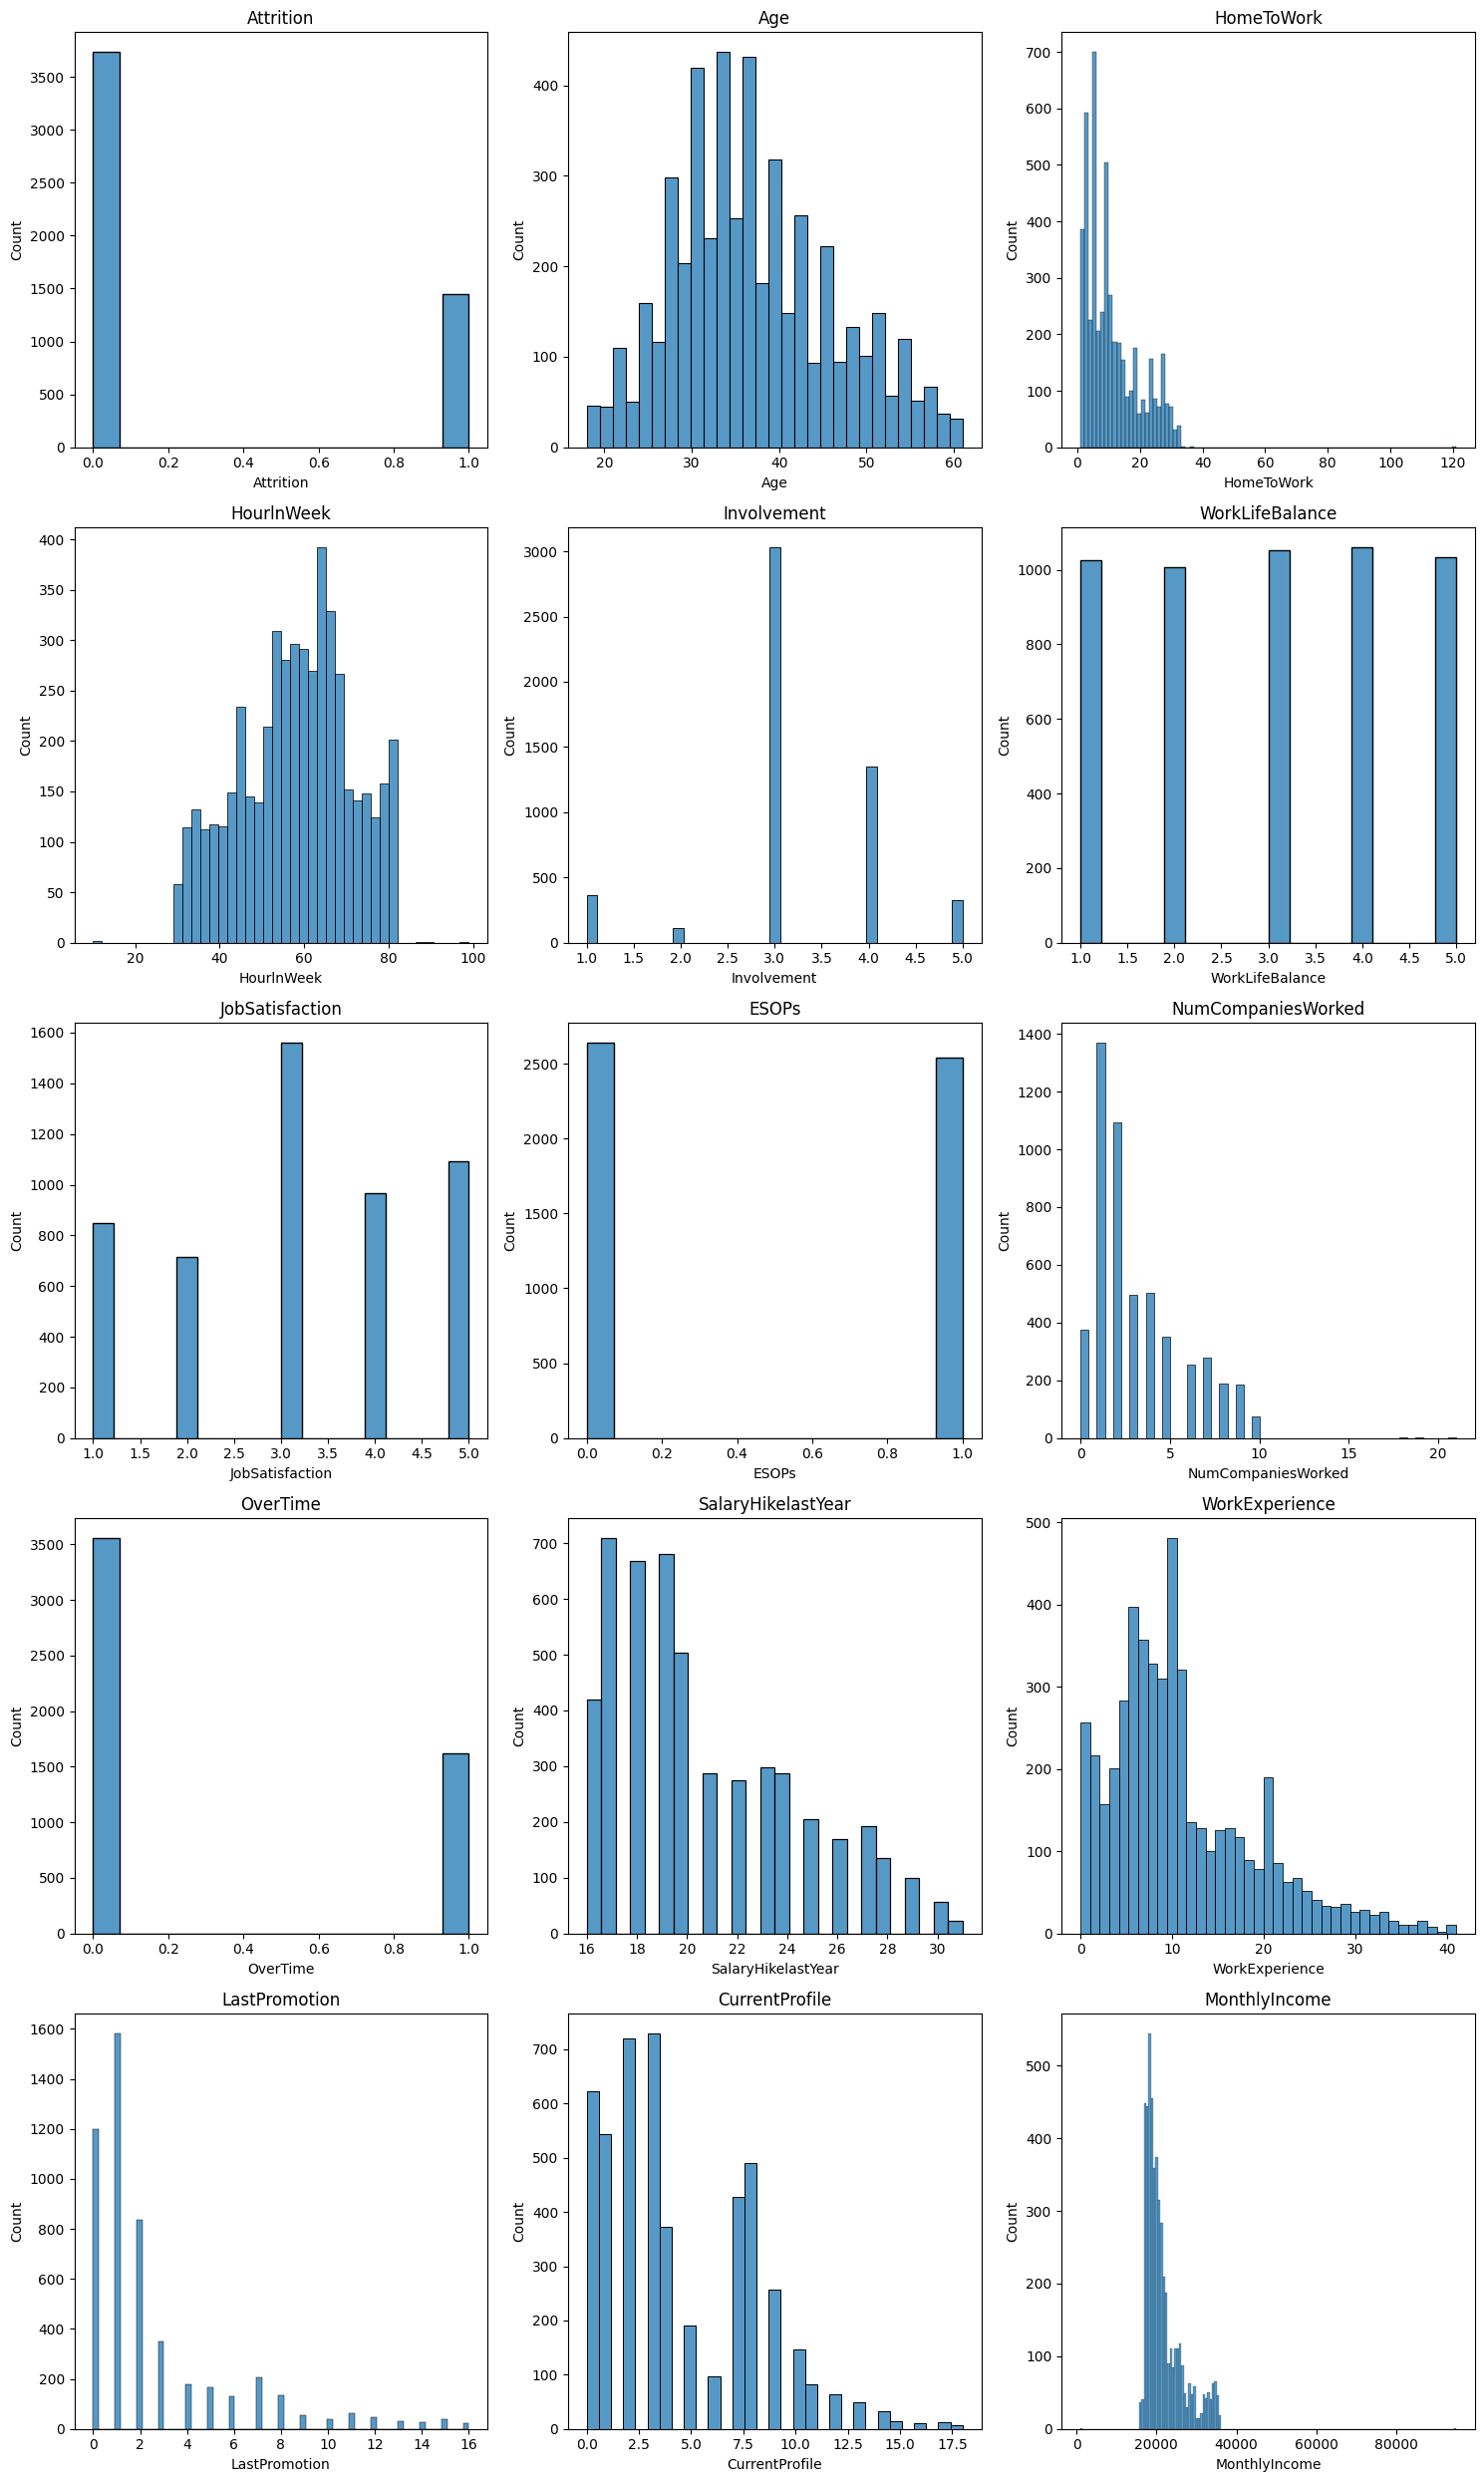

In [44]:
num_cols = len(numerical_columns[1:])
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed for subplots

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

for i, col in enumerate(numerical_columns[1:]):
    row = i // 3
    col_idx = i % 3
    sns.histplot(data[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Hide any unused subplots
for i in range(num_cols, num_rows * 3):
    row = i // 3
    col_idx = i % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

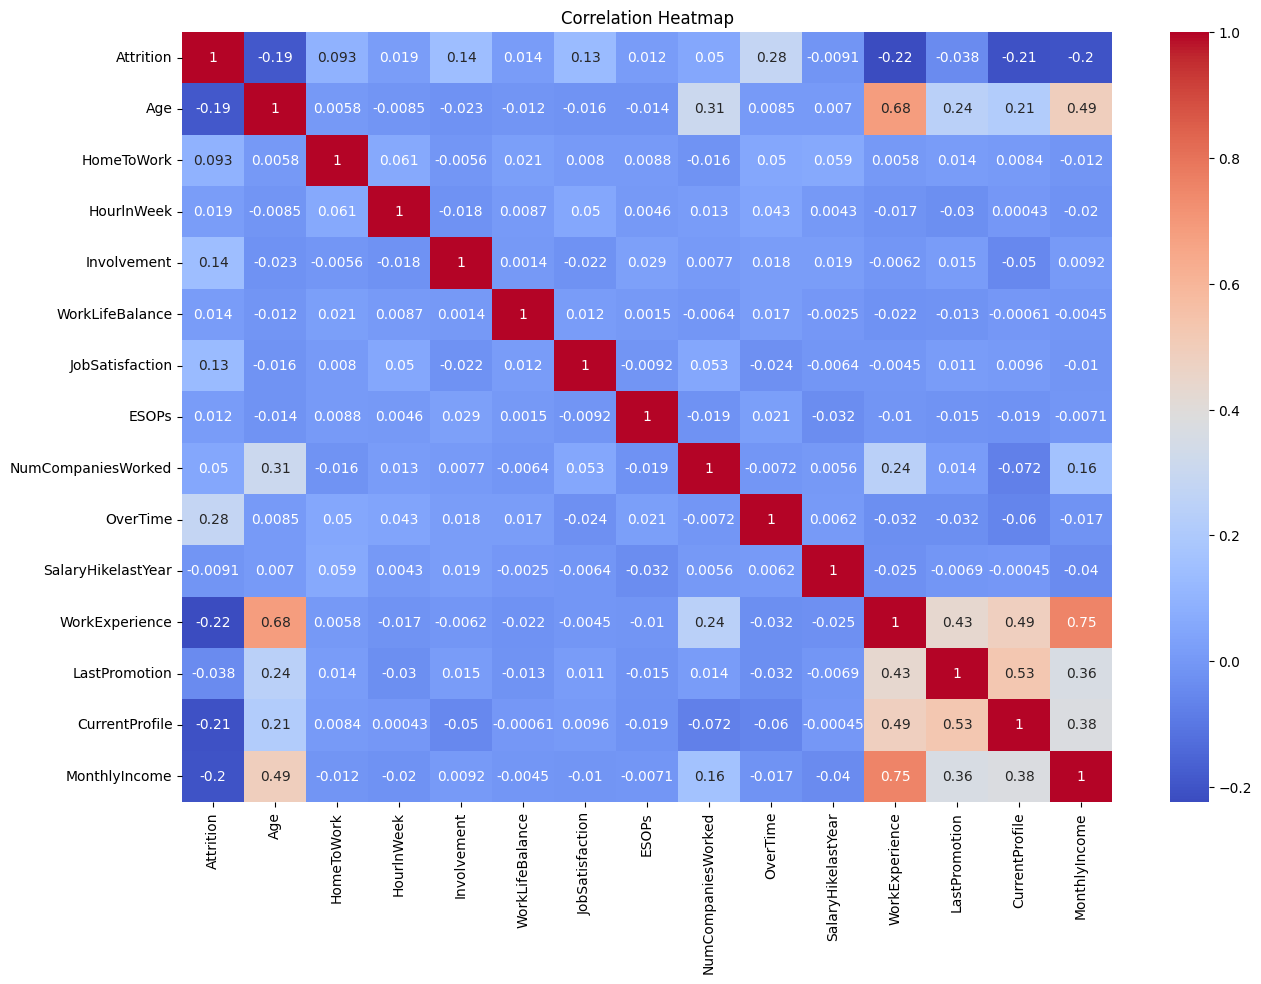

In [53]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns[1:]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Add Tranformers To apply the Missing Values, Outliers, Scaling, Encoding Techniques

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='median', categorical_strategy='mode'):
        self.strategy = strategy
        self.categorical_strategy = categorical_strategy
        self.numerical_fill_values = {}
        self.categorical_fill_values = {}

    def fit(self, X, y=None):
        # Identify numerical and categorical columns
        self.numerical_cols = X.select_dtypes(exclude='object').columns
        self.categorical_cols = X.select_dtypes(include='object').columns

        for col in self.numerical_cols:
            if self.strategy == 'median':
                self.numerical_fill_values[col] = X[col].median()
            elif self.strategy == 'mean':
                self.numerical_fill_values[col] = X[col].mean()
            else:
                raise ValueError("Invalid strategy for numerical columns. Choose 'median' or 'mean'.")

        for col in self.categorical_cols:
          if self.categorical_strategy == 'mode':
              self.categorical_fill_values[col] = X[col].mode()[0] # handle potential multiple modes
          else:
              raise ValueError("Invalid strategy for categorical columns. Choose 'mode'.")
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.numerical_cols:
            if col in X_transformed.columns : #check if column exist in data
              X_transformed[col] = X_transformed[col].fillna(self.numerical_fill_values[col])
        for col in self.categorical_cols:
            if col in X_transformed.columns: #check if column exist in data
              X_transformed[col] = X_transformed[col].fillna(self.categorical_fill_values[col])
        return X_transformed

In [56]:
class OutlierTransformation(BaseEstimator, TransformerMixin):
    def __init__(self, method='iqr', factor=1.5):
        self.method = method
        self.factor = factor
        self.lower_bounds = {}
        self.upper_bounds = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=np.number):
            if self.method == 'iqr':
                Q1 = X[col].quantile(0.25)
                Q3 = X[col].quantile(0.75)
                IQR = Q3 - Q1
                self.lower_bounds[col] = Q1 - self.factor * IQR
                self.upper_bounds[col] = Q3 + self.factor * IQR
            elif self.method == 'std':
                mean = X[col].mean()
                std = X[col].std()
                self.lower_bounds[col] = mean - self.factor * std
                self.upper_bounds[col] = mean + self.factor * std
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in X.select_dtypes(include=np.number):
            if col in self.lower_bounds:  # Check if the column exists in the bounds dictionary
                X_transformed[col] = np.clip(X_transformed[col], self.lower_bounds[col], self.upper_bounds[col])
        return X_transformed

### Build Pipeline with Multiple Models find the best model

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

class EmployeeAttritionPipeline:
    def __init__(self, model_type='logistic_regression'):
        self.model_type = model_type
        self.model = None
        self.pipeline = None

    def create_pipeline(self, numerical_cols, categorical_cols):
        numerical_transformer = Pipeline(steps=[
            ('imputer', MissingValueImputer(strategy='median')),
            ('outlier_handler', OutlierTransformation()),
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('imputer', MissingValueImputer(categorical_strategy='mode')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_cols),
                ('cat', categorical_transformer, categorical_cols)
            ])

        if self.model_type == 'logistic_regression':
            self.model = LogisticRegression()
        elif self.model_type == 'random_forest':
            self.model = RandomForestClassifier()
        elif self.model_type == 'decision_tree':
            self.model = DecisionTreeClassifier()
        else:
            raise ValueError("Invalid model type. Choose 'logistic_regression', 'random_forest', or 'decision_tree'.")

        self.pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('classifier', self.model)])
        return self.pipeline

    def fit(self, X, y):
        self.pipeline.fit(X, y)

    def predict(self, X):
        return self.pipeline.predict(X)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuracy: {accuracy}")
        print(classification_report(y,y_pred))
        return accuracy

    def cross_validate(self, X,y, cv=5):
      scores = cross_val_score(self.pipeline,X,y, cv=cv)
      print(f"Cross Validation Scores: {scores}")
      print(f"Average Cross-Validation Score: {scores.mean()}")

# Example usage
numerical_cols = numerical_columns[2:]
categorical_cols = categorical_columns


X = data.drop(columns=['Attrition', 'EmployeeID'], axis=1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the pipeline
pipeline = EmployeeAttritionPipeline(model_type='logistic_regression') #Change model type here
pipeline.create_pipeline(numerical_cols, categorical_cols)
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
pipeline.evaluate(X_test, y_test)

pipeline.cross_validate(X,y)

Accuracy: 0.8127413127413128
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       757
         1.0       0.71      0.51      0.60       279

    accuracy                           0.81      1036
   macro avg       0.77      0.72      0.74      1036
weighted avg       0.80      0.81      0.80      1036

Cross Validation Scores: [0.80212355 0.80984556 0.82142857 0.82528958 0.79613527]
Average Cross-Validation Score: 0.8109645048775483


In [59]:
# Create and train the pipeline
pipeline = EmployeeAttritionPipeline(model_type='random_forest') #Change model type here
pipeline.create_pipeline(numerical_cols, categorical_cols)
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
pipeline.evaluate(X_test, y_test)

pipeline.cross_validate(X,y)

Accuracy: 0.9893822393822393
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       757
         1.0       0.99      0.97      0.98       279

    accuracy                           0.99      1036
   macro avg       0.99      0.98      0.99      1036
weighted avg       0.99      0.99      0.99      1036

Cross Validation Scores: [0.97683398 0.98166023 0.97200772 0.98648649 0.98357488]
Average Cross-Validation Score: 0.980112659243094


In [60]:
# Create and train the pipeline
pipeline = EmployeeAttritionPipeline(model_type='decision_tree') #Change model type here
pipeline.create_pipeline(numerical_cols, categorical_cols)
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
pipeline.evaluate(X_test, y_test)

pipeline.cross_validate(X,y)

Accuracy: 0.9575289575289575
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       757
         1.0       0.90      0.95      0.92       279

    accuracy                           0.96      1036
   macro avg       0.94      0.95      0.95      1036
weighted avg       0.96      0.96      0.96      1036

Cross Validation Scores: [0.94594595 0.9488417  0.96621622 0.96718147 0.952657  ]
Average Cross-Validation Score: 0.9561684666032493


Since we got good accuracy with RandomForestClassifier we will be training with full train data set and Predict the Test Data Set

### Final Model

In [64]:
# Create and train the pipeline
pipeline = EmployeeAttritionPipeline(model_type='random_forest') #Change model type here
pipeline.create_pipeline(numerical_cols, categorical_cols)
pipeline.fit(X, y)

# Predict the pipeline
pred = pipeline.predict(test.drop('EmployeeID', axis=1))
pred = pred // 1
pred

array([1., 0., 0., ..., 0., 1., 0.])

In [65]:
result = pd.DataFrame()
result['EmployeeID'] = test['EmployeeID']
result['Attrition'] = pred

result.to_csv('result.csv', index=False)